# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 3

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1 - zakupy

W sklepie dostępne są następujące produkty:

| Produkt | Cena (netto) | Podatek |
| --- | --- | --- |
| Chleb | 3 | 5% |
| Butelka wody (1l) | 2 | 8% |
| Pomidor 1szt. | 2 | 5% |
| Olej (1l) | 6 | 5% |
| Szafran | 1.5 | 8% |
| Krewetki (opakowanie) | 20 | 23% |
| Lód (opakowanie) | 5 | 23% |


#### Zadanie 1 A

- Zapisz nazwy produktów w tablicy `N`.
- Zapisz ceny produktów w tablicy `C`.
- Zapisz podatek w tablicy `P`.

*(tablicy jedno wymiarowej czyli wektorze)*



In [396]:
# <<UZUPEŁNIJ>>
import numpy as np
import matplotlib.pyplot as plt

N = ['Chleb', 'Butelka wody (1l)', 'Pomidor', 'Olej (1l)', 'Szafran', 'Krewetki (opakowanie)', 'Lód (opakowanie)']
C = [3, 2, 2, 6, 1.5, 20, 5]
P = [0.05, 0.08, 0.05, 0.05, 0.08, 0.23, 0.23]

#### Zadanie 1 B

Klient kupił:

- 2 szt. chleba, 
- 6 butelek wody,
- 1 opakowanie krewetek.

Zapisz zakupy klienta w wektorze `Z` (zachowaj wymiarowość).

In [397]:
# <<UZUPEŁNIJ>>

Z = [2, 6, 0, 0, 0, 1, 0]
Z = np.asarray(Z)


#### Zadanie 1C

Oblicz sumę **netto** jaką klient musi zapłacić bez używania:
- operatora `+`, 
- funkcji/metody `sum`
- operatego mnożenia skalarnego (`*`, `__mul__`).

_Podpowiedź: jeden z wektorów trzeba transponować_

In [398]:
# <<UZUPEŁNIJ>>
C = np.asarray(C)
netto = C.T @ Z
netto

38.0

#### Zadanie 1D

Oblicz wartość **brutto** jaką klient musi zapłacić w sklepie. W tym zadaniu możesz użyć operatora `*`.

Dodatkowo, wyświetl rachunek w postaci tabeli zawierającą kolumny: 
- nazwa produktu,
- cena netto, 
- liczba sztuk, 
- cena netto danej pozycji (cena netto x liczba sztuk), 
- podatek (procentowo np. `5%`),
- cena brutto danej pozycji. 

Na końcu tabeli ma się wyświetlić suma brutto do zapłaty.

In [399]:
# <<UZUPEŁNIJ>>
tab = np.asarray([N, C, Z, C.T * Z, P, C.T * Z + C.T * P * Z])
ans = tab.T
suma = []
for i in range(ans.shape[1] - 2):
    suma.append(" ")

do_zaplaty = (C + C * P).T @ Z

suma.append("DO ZAPLATY: ")
suma.append(do_zaplaty)

ans = np.vstack((ans, suma))
ans

array([['Chleb', '3.0', '2', '6.0', '0.05', '6.3'],
       ['Butelka wody (1l)', '2.0', '6', '12.0', '0.08', '12.96'],
       ['Pomidor', '2.0', '0', '0.0', '0.05', '0.0'],
       ['Olej (1l)', '6.0', '0', '0.0', '0.05', '0.0'],
       ['Szafran', '1.5', '0', '0.0', '0.08', '0.0'],
       ['Krewetki (opakowanie)', '20.0', '1', '20.0', '0.23', '24.6'],
       ['Lód (opakowanie)', '5.0', '0', '0.0', '0.23', '0.0'],
       [' ', ' ', ' ', ' ', 'DO ZAPLATY: ', '43.86']], dtype='<U32')

### Zadanie 2

Zmodyfikuj kod z zadania pierwszego w ten sposób, że dane o produktach będą wczytywane z pliku `produkty.csv` a dane do rachunku (liczba zakupionych produktów) z pliku `rachunek.csv`.

Utwórz przykładowe dane (inne niż w zadaniu 1).

In [400]:
produkty = np.recfromcsv('produkty.csv', delimiter=',', encoding='utf-8')
produkty = np.asarray(produkty.tolist())


rachunek = np.recfromcsv('rachunek.csv', delimiter=',', encoding='utf-8')
rachunek = np.asarray(rachunek.tolist())
N = produkty.T[0].ravel()
C = produkty.T[1].astype('int32').ravel()
P = produkty.T[2].astype('float64').ravel()
Z = rachunek.astype('int32').ravel()


tab = np.array([N, C, Z, C.T * Z, P, C.T * Z + C.T * P * Z])

ans = tab.T
suma = []
for i in range(ans.shape[1] - 2):
    suma.append(" ")

do_zaplaty = (C + C * P).T @ Z

suma.append("DO ZAPLATY: ")
suma.append(do_zaplaty)

ans = np.vstack((ans, suma))
ans

array([['Bulka', '1', '1', '1', '0.05', '1.05'],
       ['Melon', '10', '2', '20', '0.08', '21.6'],
       ['Szynka', '15', '3', '45', '0.23', '55.35'],
       [' ', ' ', ' ', ' ', 'DO ZAPLATY: ', '78.0']], dtype='<U32')

### Zadanie 3

#### Zadanie 3 A

Utwórz dwa wektory dwuelementowe `A` i `B` (dowolne wartości dodatnie różne od zera).

Następnie wykonaj sumowanie elementów obu wektorów i zapisz w zmiennej `C`.


In [401]:
# <<UZUPEŁNIJ>>

# np.random.seed(1)

A = np.random.random(2)
B = np.random.random(2)
print(A)
print(B)

C = A + B
C

[0.15911708 0.66256426]
[0.57831141 0.31253093]


array([0.73742849, 0.97509518])

#### Zadanie 3 B

Wyświetl na wykresie:
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktów `A` oraz `B` (w kolorze <font color='green'>zielonym</font>),
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktu `C` (w kolorze <font color='red'>czerwonym</font>)
- wektor wodzący z punktu `A` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>),
- wektor wodzący z punktu `B` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>).

[0.57831141 0.31253093]
[0.15911708 0.66256426]


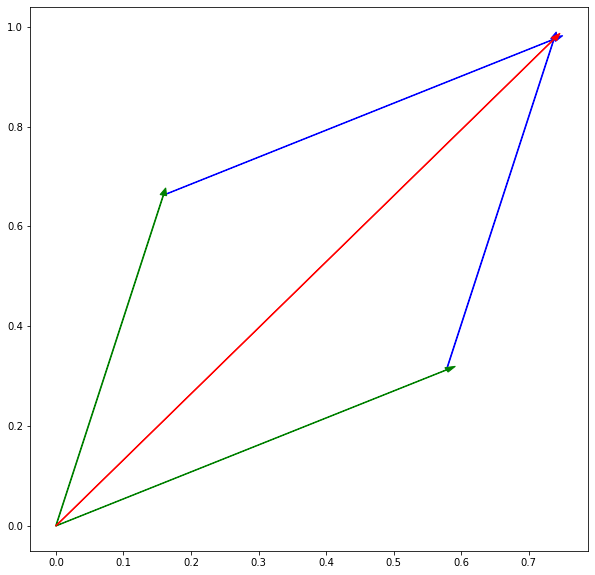

In [402]:
# <<UZUPEŁNIJ>>

D = C - A
E = C - B
print(D)
print(E)

plt.figure(figsize=(10, 10))
plt.arrow(A[0], A[1], D[0], D[1], head_width=0.01, color='blue')
plt.arrow(B[0], B[1], E[0], E[1], head_width=0.01, color='blue')
plt.arrow(0, 0, A[0], A[1], head_width=0.01, color='green')
plt.arrow(0, 0, B[0], B[1], head_width=0.01, color='green')
plt.arrow(0, 0, C[0], C[1], head_width=0.01, color='red')

plt.show()

### Zadanie 4

Wygeneruj losową macierz 8×8 wg rozkładu Gaussa (średnia: 100, odch. std = 15),
wartości zaokrąglij do liczb całkowitych (int). Macierz ta reprezentuje pewien obraz (w skali szarości).

Następnie zastosuj filtr uśredniający o masce 3×3 dla elementów wewnętrznych (tj. poza brzegiem) tej macierzy i wypisz wynik. W filtrze uśredniającym zastosuj zaokrąglanie w dół do liczby całkowitej.

_Podpowiedź: generacja danych: np.random.normal, np.round._

In [403]:
# <<UZUPEŁNIJ>>

np.random.seed(696969)

macierz = np.random.normal(100, 15, (8,8))
macierz = macierz.round()
nowa = np.empty(shape=(macierz.shape[0] - 2, macierz.shape[1] - 2))

for j in range(0, len(nowa)):
    for i in range(0, len(nowa)):
        nowa[j][i] = np.floor(macierz[j:j+3, i:i+3].mean())
        print(j, i)
        print(nowa[j][i])
        print(macierz[j:j+3, i:i+3])

macierz

0 0
95.0
[[ 88. 100. 107.]
 [ 86. 103. 108.]
 [ 96.  79.  90.]]
0 1
99.0
[[100. 107.  99.]
 [103. 108.  89.]
 [ 79.  90. 117.]]
0 2
101.0
[[107.  99. 103.]
 [108.  89. 108.]
 [ 90. 117.  88.]]
0 3
100.0
[[ 99. 103.  95.]
 [ 89. 108.  99.]
 [117.  88. 105.]]
0 4
100.0
[[103.  95. 111.]
 [108.  99. 106.]
 [ 88. 105.  93.]]
0 5
102.0
[[ 95. 111.  95.]
 [ 99. 106. 125.]
 [105.  93.  92.]]
1 0
96.0
[[ 86. 103. 108.]
 [ 96.  79.  90.]
 [ 95.  92. 118.]]
1 1
100.0
[[103. 108.  89.]
 [ 79.  90. 117.]
 [ 92. 118. 108.]]
1 2
104.0
[[108.  89. 108.]
 [ 90. 117.  88.]
 [118. 108. 112.]]
1 3
101.0
[[ 89. 108.  99.]
 [117.  88. 105.]
 [108. 112.  85.]]
1 4
98.0
[[108.  99. 106.]
 [ 88. 105.  93.]
 [112.  85.  91.]]
1 5
99.0
[[ 99. 106. 125.]
 [105.  93.  92.]
 [ 85.  91. 102.]]
2 0
93.0
[[ 96.  79.  90.]
 [ 95.  92. 118.]
 [ 85.  98.  88.]]
2 1
99.0
[[ 79.  90. 117.]
 [ 92. 118. 108.]
 [ 98.  88. 104.]]
2 2
102.0
[[ 90. 117.  88.]
 [118. 108. 112.]
 [ 88. 104.  96.]]
2 3
102.0
[[117.  88. 105.]
 [10

array([[ 88., 100., 107.,  99., 103.,  95., 111.,  95.],
       [ 86., 103., 108.,  89., 108.,  99., 106., 125.],
       [ 96.,  79.,  90., 117.,  88., 105.,  93.,  92.],
       [ 95.,  92., 118., 108., 112.,  85.,  91., 102.],
       [ 85.,  98.,  88., 104.,  96., 106., 122.,  91.],
       [109., 102., 119., 120., 106.,  95.,  98., 121.],
       [ 80., 116.,  97.,  74., 128., 113.,  87.,  84.],
       [ 86.,  95., 100., 105.,  93.,  87.,  87.,  60.]])

In [404]:
nowa

array([[ 95.,  99., 101., 100., 100., 102.],
       [ 96., 100., 104., 101.,  98.,  99.],
       [ 93.,  99., 102., 102.,  99.,  98.],
       [100., 105., 107., 103., 101., 101.],
       [ 99., 102., 103., 104., 105., 101.],
       [100., 103., 104., 102.,  99.,  92.]])